In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Plot out the species abundance over year

In [2]:
df = pd.read_csv('data/data_abundance.csv')

# Aggregate data: Count species with abundance > 0 per site and year
species_abundance = df[df['abundance'] > 0].groupby(['year', 'site']).agg(
    species_count=('species', 'nunique'),
    total_abundance=('abundance', 'sum'),
    latitude=('latitude', 'first'),
    longitude=('longitude', 'first')
).reset_index()

# Get unique years for animation frames
years = sorted(species_abundance['year'].unique())

# Set up figure and scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")

# Initial plot with dummy data to set up the colorbar
sc = ax.scatter([], [], s=[], c=[], cmap='viridis', alpha=0.7, vmin=species_abundance['species_count'].min(), vmax=species_abundance['species_count'].max())

# Add colorbar (placed outside update function)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Number of Species")

def update(frame):
    """Update function for animation."""
    year = years[frame]
    subset = species_abundance[species_abundance['year'] == year]
    
    # Update scatter plot data
    sc.set_offsets(np.c_[subset['longitude'], subset['latitude']])
    sc.set_sizes(subset['species_count']*100)  # Scale size for visibility
    sc.set_array(subset['species_count'])  # Update color values
    sc.set_clim(species_abundance['species_count'].min(), species_abundance['species_count'].max())  # Explicitly set color limits
    
    ax.set_title(f"Species Count and Abundance in {year}", fontsize=14)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    ax.grid(True)
    ax.set_xlim(df['longitude'].min() - 0.5, df['longitude'].max() + 0.5)
    ax.set_ylim(df['latitude'].min() - 0.5, df['latitude'].max() + 0.5)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(years), repeat=False, interval=1e20)

# Display animation
plt.close(fig)  # Prevent duplicate static display
HTML(ani.to_jshtml())

# Save as GIF
ani.save("plots/species_abundance_animation.gif", writer="pillow", fps=1, dpi=150)


# Plot correlations 

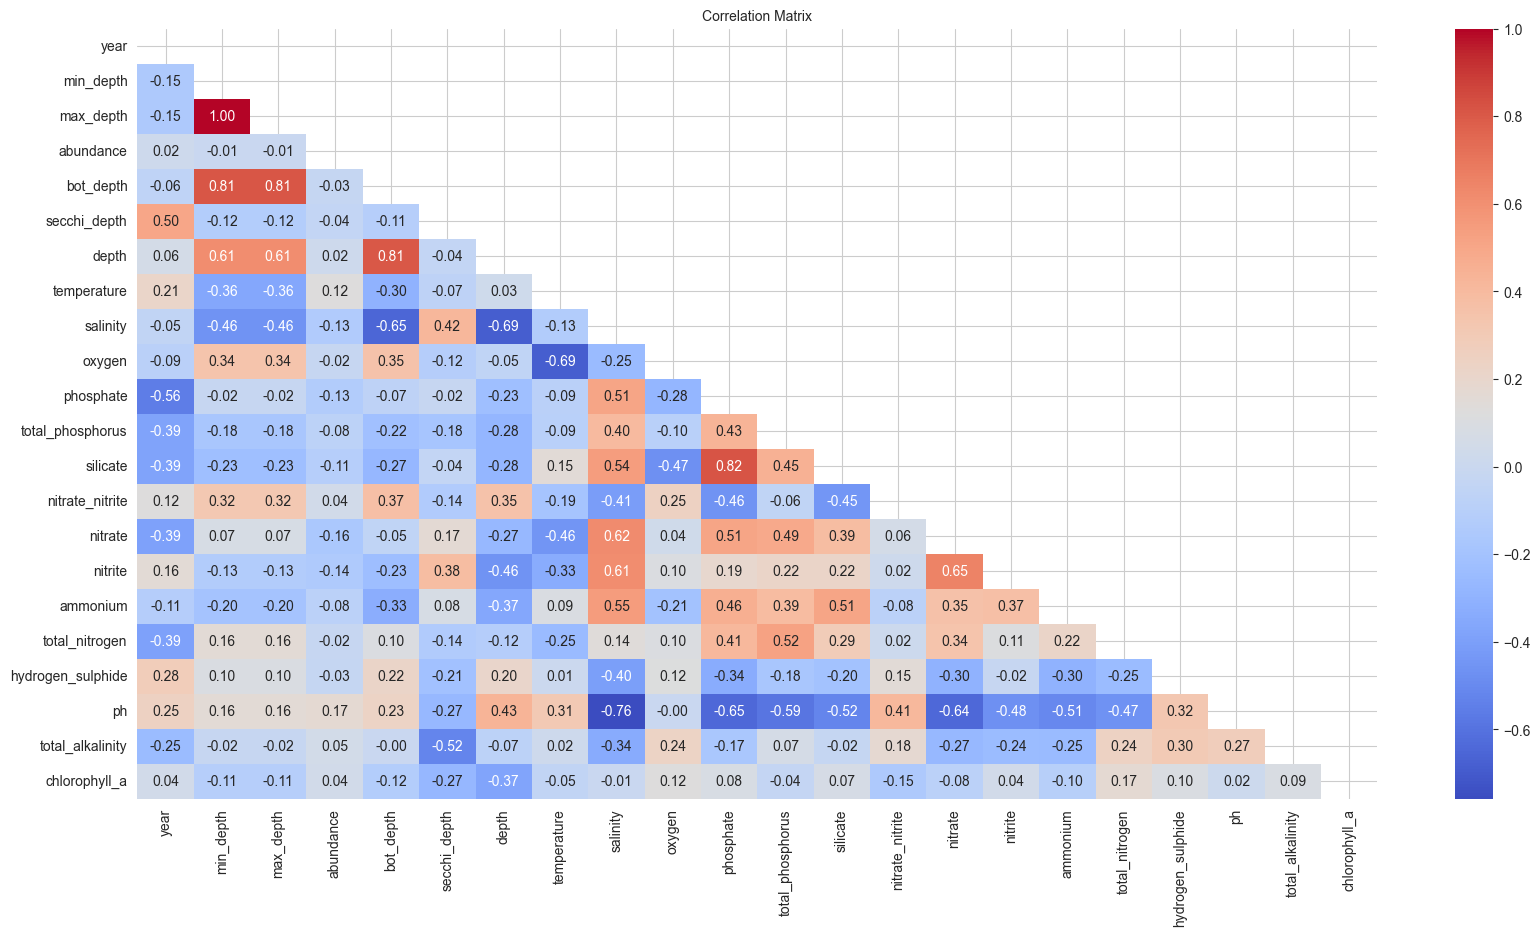

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plot correlation matrix between species abundance and environmental variables
df = pd.read_csv('data/data_abundance.csv')
df_num = df.select_dtypes(include=[np.number])
df_num = df_num.drop(columns=['latitude', 'longitude'])
# df_num = df_num[df_num['year'] == 2000]
# df_num = df_num.groupby(['year']).mean().reset_index()
# df_num = df_num.drop(columns=['min_depth', 'max_depth', 'site'])

# Rearrange the columns
# df_num = df_num[['abundance', 'year', 'latitude_y', 'longitude_y',
#        'depth', 'temperature', 'salinity',
#        'oxygen', 'phosphate', 'total_phosphorus', 'silicate',
#        'nitrate_nitrite', 'nitrate', 'nitrite', 'ammonium', 'total_nitrogen',
#        'hydrogen_sulphide', 'ph', 'total_alkalinity', 'chlorophyll_a']]
plt.figure(figsize=(20, 10))
# Only see half of the matrix
mask = np.zeros_like(df_num.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title("Correlation Matrix", fontsize=10)
plt.show()
